## Customer Segmentation


### Problem Statement
A United Kingdom (UK)-based online retail shop wants to maximize sales, so it decides to study its customers' behavior and segment them appropriately to improve targe marketing.




### Project Objective
The main purpose of this analysis is to help the business better understand its customers and therefore conduct customer-centric marketing more effectively. On the basis
of the RFM model, customers of the business have been segmented into various meaningful groups using the k-means clustering


### Steps for the task

1. Import the libraries and data
2. Getting an overview of the business
3. Moving to KMeans
4. Building Customer personnas

### Importing the libraries

In [1]:
#import necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
sns.set()
%matplotlib inline

In [2]:
#import data,applied encoding to avoid errors which might have occured due to invalid characters 
retail_data= pd.read_csv('Group3-data.csv',parse_dates=['InvoiceDate'], encoding='unicode_escape')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#get over view of data set
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#observing the missing values
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#observing rows and colums
retail_data.shape

(541909, 8)

In [6]:
#dropping the description column
retail_data.drop('Description',axis=1,inplace=True)

In [7]:
#descriptive statistics of the data
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


we have negative price and quanity as such, need to drop those rows

In [8]:
#dropping rows with quantity 0 or less
filt= retail_data[retail_data['Quantity']<= 0]


In [9]:
retail_data.drop(filt.index, inplace=True)

In [10]:
#dropping negative price
filt_1=retail_data[retail_data['UnitPrice']<=0]
retail_data.drop(filt_1.index,inplace=True)

In [11]:
#observing shape after cleaning data
retail_data.shape

(530104, 7)

In [12]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [13]:
#adding new column for sales
retail_data['Sales']=retail_data['UnitPrice']*retail_data['Quantity']
retail_data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# getting an overview of the business

In [14]:
#number of customers
retail_data['CustomerID'].nunique()

4338

In [15]:
#total sales
retail_data['Sales'].sum()

10666684.544

In [16]:
#customer representation by country
retail_data['Country'].nunique()

38

In [17]:
#sales distribution
retail_data.groupby('Country')['Sales'].sum().sort_values(ascending=False)

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

In [18]:
retail_data['Sales'].mean()

20.121871451639677

#### Engineering the features of clustering
1. recency- how recently a customer visited.
latest date-last last invoice date

2. frequency-how often a customer visits.
count of invoice no per customer ID

3. monetary- how much a customer spends.
total sales per customer

In [19]:
#sorting by dates to view last invoice date, then set latest date
retail_data.sort_values('InvoiceDate')

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541896,581587,22555,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541895,581587,22556,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541900,581587,22730,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00


In [20]:
#to calculate number of days from the most recent purchase
latest_date = '2011-12-11'
latest_date = pd.to_datetime(latest_date)

In [21]:
grouped_data=retail_data.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,
                                                    'Sales':'sum',
                                                    'InvoiceNo':'nunique'})
#convert invoice date to string
# grouped_data['InvoiceDate']=grouped_data['InvoiceDate'].astype(int)
grouped_data

,InvoiceDate,Sales,InvoiceNo
CustomerID,,,
12346.0,326,77183.60,1
12347.0,3,4310.00,7
12348.0,76,1797.24,4
12349.0,19,1757.55,1
12350.0,311,334.40,1
...,...,...,...
18280.0,278,180.60,1
18281.0,181,80.82,1
18282.0,8,178.05,2


In [22]:
#assigning new names to the columns
grouped_data=grouped_data.rename({'InvoiceDate':'Recency', 'InvoiceNo':'Frequency', 'Sales':'Monetary'},axis=1)
grouped_data

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,326,77183.60,1
12347.0,3,4310.00,7
12348.0,76,1797.24,4
12349.0,19,1757.55,1
12350.0,311,334.40,1
...,...,...,...
18280.0,278,180.60,1
18281.0,181,80.82,1
18282.0,8,178.05,2


In [23]:
## observing descriptive stats of the grouped data
grouped_data.describe()

,Recency,Monetary,Frequency
count,4338.000000,4338.000000,4338.000000
mean,93.059474,2054.266460,4.272015
std,100.012264,8989.230441,7.697998
min,1.000000,3.750000,1.000000
25%,18.000000,307.415000,1.000000
50%,51.000000,674.485000,2.000000
75%,142.750000,1661.740000,5.000000
max,374.000000,280206.020000,209.000000


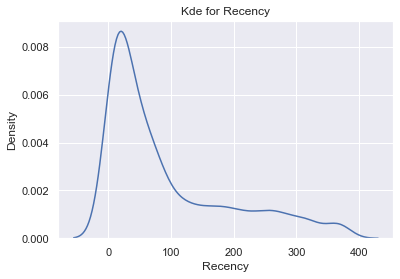

In [24]:
# Observing distribution of the recency data
sns.kdeplot(data=grouped_data, x='Recency')
# Give title to the plot
plt.title('Kde for Recency');

It can be seen from the Kde for Recency that Recency distribution is skewed to the right

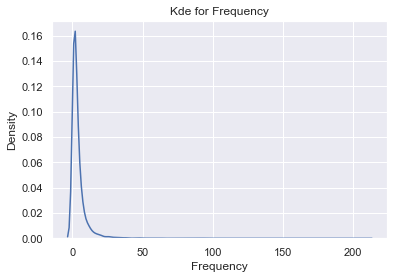

In [25]:
# # Observing distribution of the frequency data
sns.kdeplot(data=grouped_data, x='Frequency')
# Give title to the plot
plt.title('Kde for Frequency');

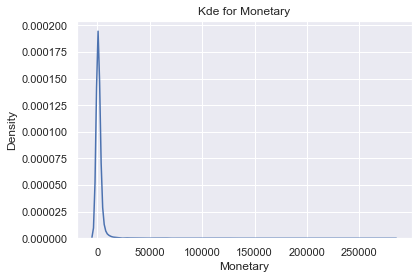

In [26]:
sns.kdeplot(data=grouped_data, x='Monetary')
plt.title('Kde for Monetary');

data is skewed to the right for recency and frequency, suggesting the need to transform the data before computing k means.


In [27]:
# Transforming the data using numpy logarithm function to make the data distribution near normal
cluster_data = np.log(grouped_data)

In [28]:
# Display the first 10 observations of the transformed data (cluster_data)
cluster_data.head(10)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,5.786897,11.253942,0.000000
12347.0,1.098612,8.368693,1.945910
12348.0,4.330733,7.494007,1.386294
12349.0,2.944439,7.471676,0.000000
12350.0,5.739793,5.812338,0.000000
12352.0,3.610918,7.826459,2.079442
12353.0,5.323010,4.488636,0.000000
12354.0,5.451038,6.984161,0.000000
12355.0,5.370638,6.129921,0.000000


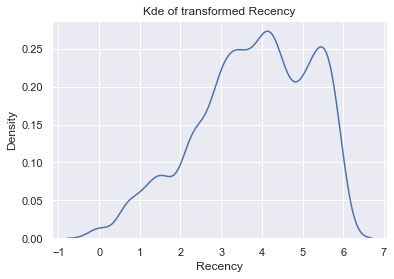

In [29]:
# Now let find out the distribution of the Recency and Frequency

sns.kdeplot(x='Recency', data=cluster_data)
plt.title('Kde of transformed Recency');

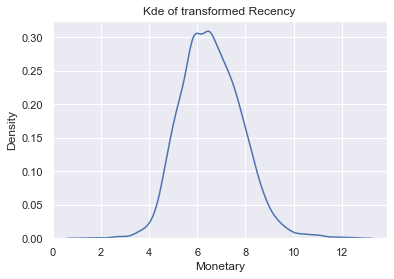

In [30]:
# Find the distribution for the transformed recency
sns.kdeplot(x='Monetary', data=cluster_data)
plt.title('Kde of transformed Recency');

It can also now been seen that the data distribution for Monetary is almost normal. 

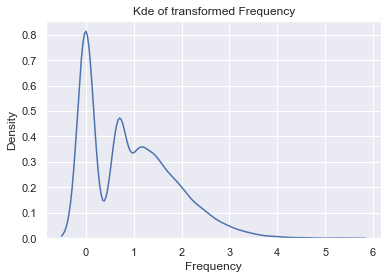

In [32]:
sns.kdeplot(x='Frequency', data=cluster_data)
plt.title('Kde of transformed Frequency');

### Moving To KMeans

In [33]:
# Import the Sklearn packages for the model

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [34]:
# Instantiate StandardScaler
scaler = StandardScaler()

In [35]:
#scale the cluster_data

scaler.fit_transform(cluster_data)

array([[ 1.43541649,  3.69871931, -1.04861045],
       [-1.95339285,  1.410201  ,  1.11183567],
       [ 0.38286482,  0.71641884,  0.49052242],
       ...,
       [-1.24442502, -1.11736527, -0.27904402],
       [-1.74544908,  0.83796882,  2.02965529],
       [-0.028808  ,  0.73389579,  0.17112349]])

Now the data transformed data is scaled, it's now suitable to fit the KMeans model to it. 

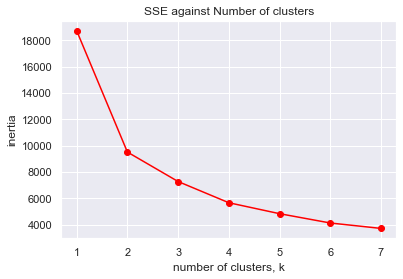

In [36]:
#choosing the best number of clusters using the elbow method
km=range(1,8)
inertia=[]
for k in km:
    RFM_model=KMeans(n_clusters=k,random_state=42)#create a k means instance with k clusters
    RFM_model.fit(cluster_data)
    inertia.append(RFM_model.inertia_)#appending our empty list with sse of each k instance
    
plt.plot(km, inertia, '-o', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(km)
# Set title
plt.title('SSE against Number of clusters')
plt.show()

In [37]:
# Create a KMeans model with 3 clusters: model
RFM_model=KMeans(n_clusters=3,random_state=42)

#use fit_predict model to obtain cluster labels
labels=RFM_model.fit_predict(cluster_data)
labels

array([0, 1, 0, ..., 0, 1, 0])

In [38]:
#creating a new column with name labels in the dataframe
grouped_data['labels']=labels
grouped_data

,Recency,Monetary,Frequency,labels
CustomerID,,,,
12346.0,326,77183.60,1,0
12347.0,3,4310.00,7,1
12348.0,76,1797.24,4,0
12349.0,19,1757.55,1,0
12350.0,311,334.40,1,2
...,...,...,...,...
18280.0,278,180.60,1,2
18281.0,181,80.82,1,2
18282.0,8,178.05,2,0


In [39]:
# Let me find out the colours suitable for the clustering

sns.color_palette("bright",10)

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [40]:
# Let select blue, orange and green
blue,orange,green = sns.color_palette('bright')[:3]

# I think red will do a magic so let include it and drop the orange
red = sns.color_palette('bright')[3]

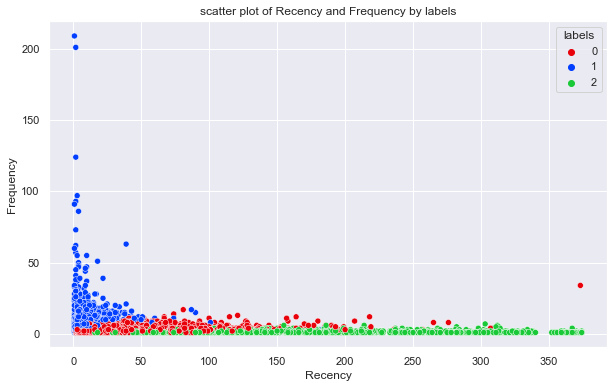

In [41]:
# Now let me find out how well is the KMeans model perform Using recency and Frequency
plt.figure(figsize=(10,6))
# Get the scatter plot
sns.scatterplot(data=grouped_data, x='Recency', y='Frequency',hue='labels',palette=[red,blue,green])
# Give a title to the plot
plt.title('scatter plot of Recency and Frequency by labels');

From the scatter plot above, the blue customers are the most recent, and go to the online shop frequently than any other customers. The red customers are also recent and frequent to the shop but not more than the blue customers. The green customers are the least to visit the shop and as such has the highest recency 

# Building customer personnas

In [42]:
# USING SNAKE PLOT METRIC TO BUILD CUSTOMER PERSONNAS

# Drop the labels column from the grouped_data
normalize_data = grouped_data.drop("labels", axis=1)
normalize_data.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,326,77183.60,1
12347.0,3,4310.00,7
12348.0,76,1797.24,4


In [43]:
'''
Normalize the data by substracting the mean and dividing each attribute by its standard deviation. This will make all the attributes to have equal
importance in building the snake plot.
'''
# Substract the mean of each attribute from its attribute.
normalize_data = normalize_data.sub(normalize_data.mean())

# Divide each attribute by its standard deviation and assign it to a new variable called normalize_data
normalize_data = normalize_data.divide(normalize_data.std())

# Check for the first three rows of normalize_data to see if the data has been normalized
normalize_data.head(3)

,Recency,Monetary,Frequency
CustomerID,,,
12346.0,2.329120,8.357705,-0.425048
12347.0,-0.900484,0.250937,0.354376
12348.0,-0.170574,-0.028593,-0.035336


In [44]:
# Reset the index of the normalize data, and set it to a new variable named normal
normal = normalize_data.reset_index()
normal.head(3)

,CustomerID,Recency,Monetary,Frequency
0,12346.0,2.329120,8.357705,-0.425048
1,12347.0,-0.900484,0.250937,0.354376
2,12348.0,-0.170574,-0.028593,-0.035336


In [45]:
# Now add the labels to the normal data
normal['labels']=labels
normal.head(3)

,CustomerID,Recency,Monetary,Frequency,labels
0,12346.0,2.329120,8.357705,-0.425048,0
1,12347.0,-0.900484,0.250937,0.354376,1
2,12348.0,-0.170574,-0.028593,-0.035336,0


In [46]:
# Melt the data to make it ready for the snake plot, and name it melt
melt_data = normal.melt(id_vars=['CustomerID','labels'],
                       value_vars=['Recency','Monetary','Frequency'],
                        var_name= 'Segment',
                       value_name='Values')

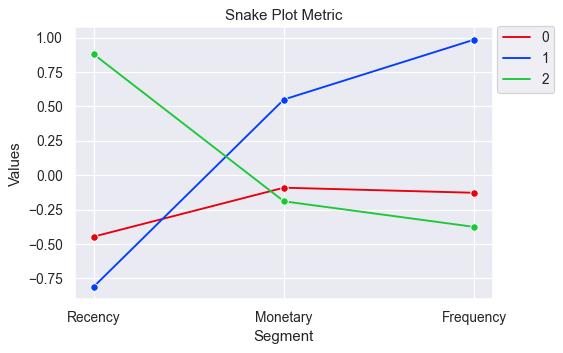

In [47]:
# Plot the snakeplot metric to examine the customer personas
plt.figure(dpi=90)
sns.lineplot(data=melt_data, x='Segment', y='Values', hue='labels',
             ci=None, 
             palette=[red,blue,green],
             marker='o')
# Give a title to the figure
plt.title('Snake Plot Metric')

# Let the legend be outside of the figure
plt.legend(loc=(1.01,0.76))
plt.show()

From the Snake plot above, the blue line represent customers in label 1, they have the least recency value meaning they are the most recent. They also have the highest frequency and monetary value. The red line represent customers in label 0. They have the second least recency value meaning they are recent but second to label customers. The red customers also are second in generating revenue, being frequent on the online shop. lastly, the green line represents customers in label 2. These customers generate the least of income, and they have the least value of frequency which reflect in the high recency value.

In [48]:
#Using summary statistics to build personnas
#assigning customers to their labels and using agg method to observe summary statistics
grouped_data.groupby('labels').agg({'Monetary':'mean','Frequency':'mean','Recency':['mean','count']}).round(2)

Monetary Frequency Recency      
           mean      mean    mean count
labels                                 
0       1237.90      3.29   48.41  1759
1       6999.40     11.85   11.99   877
2        349.86      1.38  180.98  1702

From the table label 1 customers are the most frequent, most recent and spent the most,they are the most valuable customers. Their purchases make up over 80% of sales
This is followed by customers in label 1 cluster then label 0 cluster. As such i assign customers to categories
indicating their importance to the business.

In [49]:
#Using relative importance of cluster attributes compared to population to build personnas
cluster_avg=grouped_data.groupby('labels').mean() #calc. avg. values of each cluster
population_avg=grouped_data.mean(numeric_only=True) #calc. avg.values of population
relative_imp = cluster_avg/population_avg - 1 #calculating importance score
#subtracting 1 ensures 0 is returned when cluster average equals population average)
relative_imp

,Frequency,Monetary,Recency,labels
labels,,,,
0,-0.230019,-0.397398,-0.479753,NaN
1,1.774547,2.407253,-0.871197,NaN
2,-0.676659,-0.829693,0.944728,NaN


In [50]:
# Drop the labels column from the table

relative_imp2=relative_imp.drop('labels',axis=1)
relative_imp2

,Frequency,Monetary,Recency
labels,,,
0,-0.230019,-0.397398,-0.479753
1,1.774547,2.407253,-0.871197
2,-0.676659,-0.829693,0.944728


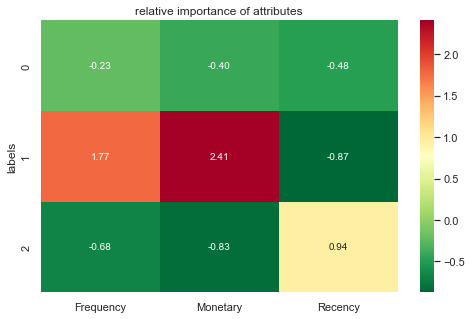

In [51]:
#visualising using a heatmap
plt.figure(figsize=(8,5))
plt.title('relative importance of attributes')
sns.heatmap(data=relative_imp2,annot=True, fmt='.2f', cmap='RdYlGn_r')
plt.show()

The heatmap provides an easy way to understand how our K-Means model places relative importance of our RFM attributes to assign each customer to their respective segments. The further a ratio is from 0, the more important that attribute is for a segment relative to the total population

In [52]:
#Labeling customers by segments
segments = {0:'gold',1:'platinum',2:'silver'}
grouped_data['segment'] = grouped_data['labels'].map(segments)
grouped_data.head()

,Recency,Monetary,Frequency,labels,segment
CustomerID,,,,,
12346.0,326,77183.60,1,0,gold
12347.0,3,4310.00,7,1,platinum
12348.0,76,1797.24,4,0,gold
12349.0,19,1757.55,1,0,gold
12350.0,311,334.40,1,2,silver


In [53]:
#reset index of the grouped data
grouped_data=grouped_data.reset_index()


#extracting only the customer ID and segment
cluster=grouped_data[['CustomerID','segment']]




In [54]:
# merging cluster data to the orginal data
final_data= pd.merge(left=retail_data,right=cluster,how='inner',on='CustomerID')
final_data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,segment
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,gold
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,gold
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,gold
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,gold
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,gold
...,...,...,...,...,...,...,...,...,...
397879,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,15.00,platinum
397880,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,platinum
397881,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,10.20,platinum
397882,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,24.96,platinum


In [55]:
# Export the final data in a csv format
final_data.to_csv("finaldata.csv",index=False)